<a href="https://colab.research.google.com/github/samthakur587/machine-learning-and-DL/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bing_image_downloader


In [ ]:
!mkdir images
from bing_image_downloader import downloader
downloader.download("Supercars",limit=20,output_dir='images',
                    adult_filter_off=True)

In [ ]:
downloader.download("Moto Guzzi 850 ElDorado",limit=20,output_dir='images',
                    adult_filter_off=True)

In [ ]:
downloader.download("soft serve ice cream cone",limit=20,output_dir='images',
                    adult_filter_off=True)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

In [7]:
import numpy as np

import os
datadir = '/content/images'
cat = ['Bike','Car','Ice Cream']
target = []
images = []
flat_data = []
for i in cat:
  class_num = cat.index(i)
  path = os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #plt.imshow(img_array)
    #plt.show()
    img_resize = resize(img_array,(150,150,3)) # value gets convert 0-1 from 0-255
    flat_data.append(np.ndarray.flatten(img_resize))
    target.append(class_num)
    images.append(img_resize)
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)


  

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3, random_state=0)

In [9]:
from sklearn.svm import SVC

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100],
              'kernel':['linear','rbf','poly'],
              'gamma':[0.0001,0.001,0.01,0.1,1]
              }

grid = GridSearchCV(SVC(),param_grid)
grid.fit(x_train,y_train)

In [11]:
y_pred = grid.predict(x_test)
y_pred

array([2, 1, 2, 1, 0, 0, 1, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 0])

In [12]:
grid.best_params_

{'C': 0.1, 'gamma': 0.0001, 'kernel': 'linear'}

In [13]:
y_test

array([1, 1, 2, 1, 0, 0, 1, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 0])

In [14]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
confusion_matrix(y_pred,y_test)


array([[5, 0, 0],
       [0, 6, 0],
       [0, 1, 6]])

In [15]:
accuracy_score(y_pred,y_test)

0.9444444444444444

In [ ]:
print(classification_report(y_pred,y_test))



In [18]:
# save the model using pickle library
import pickle
pickle.dump(grid,open('img_model.p','wb'))


In [19]:
model = pickle.load(open('img_model.p','rb'))

ENTER YOUR URLhttps://images.cdn.circlesix.co/image/1/640/0/uploads/articles/12357200_185713278441903_73555-566ebe2ed5838.jpg
 PREDICTED OUTPUT: Car


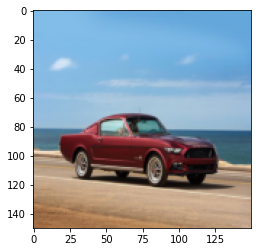

In [21]:
#testing a new image 
flat_data = []
url = input('ENTER YOUR URL' )
img = imread(url)
img_resize = resize(img,(150,150,3))
flat_data.append(img_resize.flatten())
flat_data = np.array(flat_data)
plt.imshow(img_resize)
y_out = model.predict(flat_data)
y_out = cat[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')
